Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [36]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

# DataPreprocessing

In [2]:
#Loading dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here we can see that there are multiple datatypes in columns. For example integer,float and object.

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:>

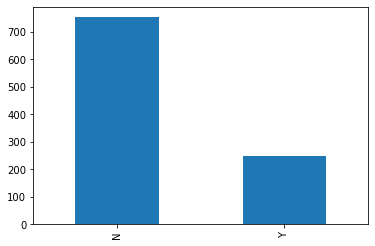

In [7]:
df["fraud_reported"].value_counts().plot.bar()

so the target class is very imbalanced. This makes the classification more difficult. 

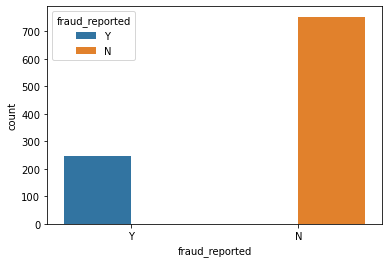

In [8]:
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

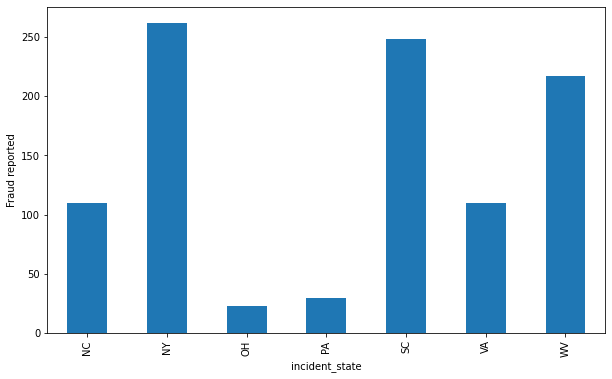

In [9]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

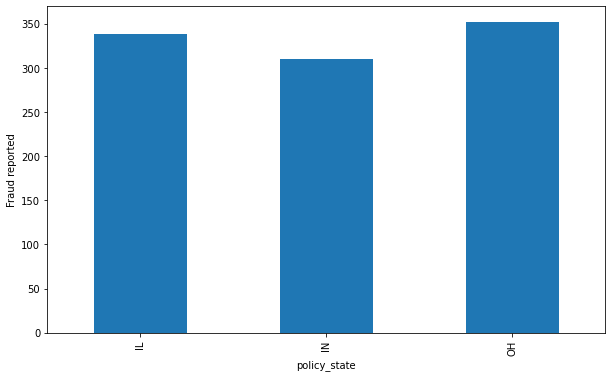

In [10]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

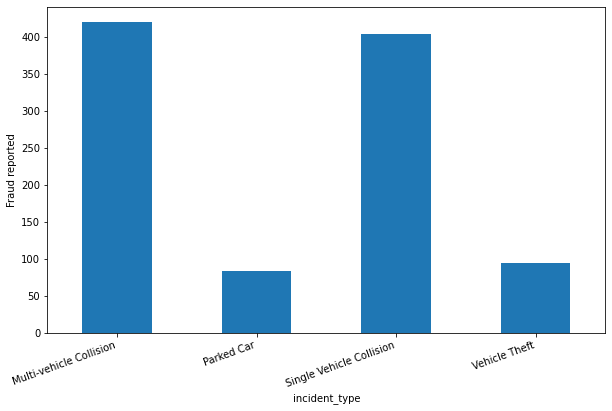

In [11]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

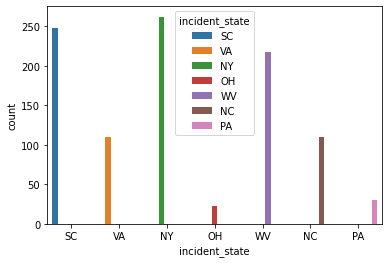

In [12]:
ax = sns.countplot(x='incident_state', data=df, hue='incident_state')

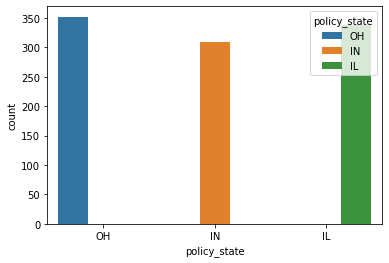

In [13]:
ax = sns.countplot(x='policy_state', data=df, hue='policy_state')

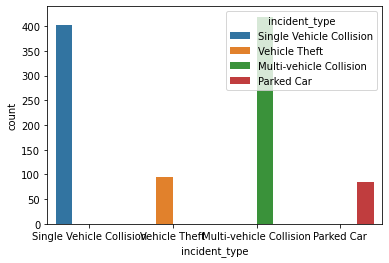

In [14]:
ax = sns.countplot(x='incident_type', data=df, hue='incident_type')

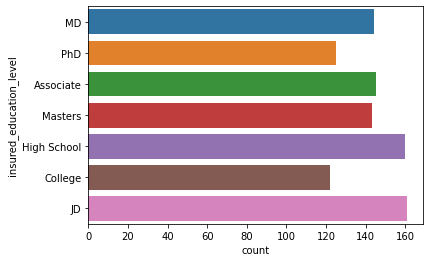

In [15]:
ax = sns.countplot(y = 'insured_education_level', data=df) 

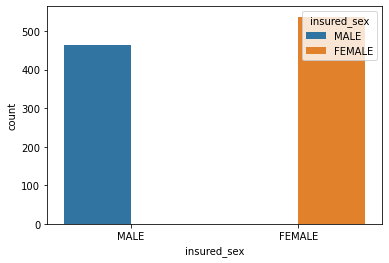

In [18]:
ax = sns.countplot(x='insured_sex', data=df, hue='insured_sex')

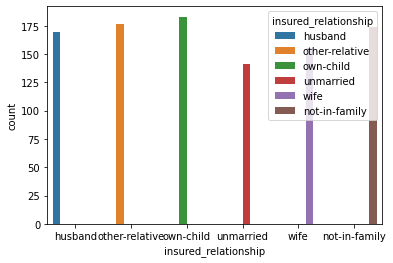

In [19]:
ax = sns.countplot(x='insured_relationship', data=df, hue='insured_relationship')

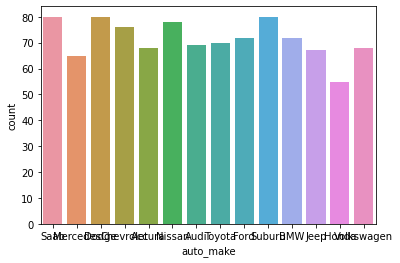

In [23]:
ax = sns.countplot(x='auto_make', data=df)

Text(0.5, 1.0, '% Relationship')

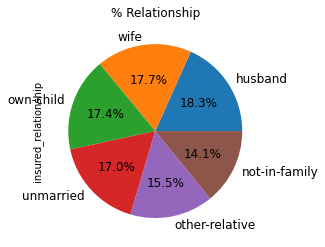

In [20]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')

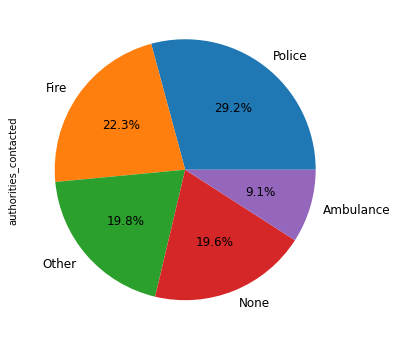

In [21]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

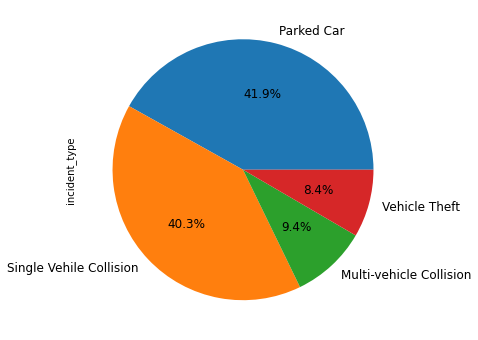

In [22]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)

Cleaning up the data and prepare it for machine learning model

In [24]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [25]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [26]:
df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,1


In [27]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [28]:
df.select_dtypes(include=['object']).columns 

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [30]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,?,NO,NO,0


In [33]:
x = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [34]:
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,?,?,?
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Rear Collision,NO,NO
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,Front Collision,?,NO
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,?,NO,NO


In [35]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

Applying one-hot encoding to convert all categorical variables except out target variables 'collision_type', 'property_damage', 'police_report_available', 'fraud_reported'

In [37]:
x['collision_type'] = LabelEncoder().fit_transform(dummies['collision_type'])
x['property_damage'].replace(to_replace='YES', value=1, inplace=True)
x['property_damage'].replace(to_replace='NO', value=0, inplace=True)
x['property_damage'].replace(to_replace='?', value=0, inplace=True)
x['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
x['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
x['police_report_available'].replace(to_replace='?', value=0, inplace=True)
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,3,1,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x = pd.concat([x, df._get_numeric_data()], axis=1)  # joining numeric columns
x.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,53300,0,1,1,2,71610,6510,13020,52080,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,5070,780,780,3510,1


In [39]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object', length=153)

In [40]:
x = x.drop(columns = ['fraud_reported'])
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object', length=152)

In [41]:
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0,0,1,0,1,0,0,1,0,0,...,0,53300,0,1,1,2,71610,6510,13020,52080
1,0,1,0,0,1,0,0,1,0,0,...,5000000,0,0,1,0,0,5070,780,780,3510
2,0,0,1,1,0,0,1,0,0,0,...,5000000,35100,0,3,2,3,34650,7700,3850,23100
3,1,0,0,0,1,0,1,0,0,0,...,6000000,48900,-62400,1,1,2,63400,6340,6340,50720
4,1,0,0,0,0,1,0,1,1,0,...,6000000,66000,-46000,1,0,1,6500,1300,650,4550


In [42]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    mod=DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.84  on Random_state  181


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=181, test_size=0.1)

In [44]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
Accuracy Score: 0.78
Confusion Matrix: [[78  1]
 [21  0]]
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.99      0.88        79
           1       0.00      0.00      0.00        21

    accuracy                           0.78       100
   macro avg       0.39      0.49      0.44       100
weighted avg       0.62      0.78      0.69       100



Accuracy score of DecisionTreeClassifier() is:
Accuracy Score: 0.86
Confusion Matrix: [[73  6]
 [ 8 13]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91        79
           1       0.68      0.62      0.65        21

    accuracy                           0.86       100
   macro avg       0.79      0.77      0.78       100
weighted avg       0.86      0.86      0.86       100



Accuracy score of SVC() is:
Accuracy Score: 0.79
Confusion Matrix: [[79  0]
 [21  0]]
Clas

# Cross Validation

In [45]:
cvs=cross_val_score(LogisticRegression(),x,y,cv=5)
print("cross validation score of LogisticRegression model :",cvs.mean())
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())
cvs=cross_val_score(SVC(),x,y,cv=5)
print("cross validation score of SVC model :",cvs.mean())
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",cvs.mean())

cross validation score of LogisticRegression model : 0.748
cross validation score of DecisionTreeClassifier model : 0.786
cross validation score of SVC model : 0.7529999999999999
cross validation score of RandomForestClassifier model : 0.7740000000000001


By cross validation score we can surely confirm that LogisticRegression model is the best model for our problem statement. Let's do further processing to improve this score more.

In [46]:
logistic=LogisticRegression()
penalty=['l1','l2']
C=np.logspace(0,4,10)

hyperparameters=dict(C=C,penalty=penalty)
clf=GridSearchCV(logistic,hyperparameters,cv=5,verbose=0)
best_model=clf.fit(x,y)

print('Best penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 464.15888336127773


In [47]:
model=LogisticRegression(C=464,penalty='l2')
results=cross_val_score(model,x,y,cv=5)
print("Accuracy:",results.mean()*100)

Accuracy: 74.7


Using hyper parameter tuning, we get more accurate parameters for our model to improve accuracy score. Now this model is final and we can use it further for analysis in InsuranceClaimsFraudDetection Project.

# Saving Best model

In [48]:
import joblib
joblib.dump(model,"InsuranceClaimsFraudDetection.pkl")

['InsuranceClaimsFraudDetection.pkl']

Saving the best model for our project. So that we can use same in future to predict accurate results.